In [1]:
# @title Importing The Required Libraries {"form-width":"10000%","display-mode":"form"}
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
  data=pd.read_csv('creditcard.csv')
except FileNotFoundError:
    print("The file was not found. Please check the path.")

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

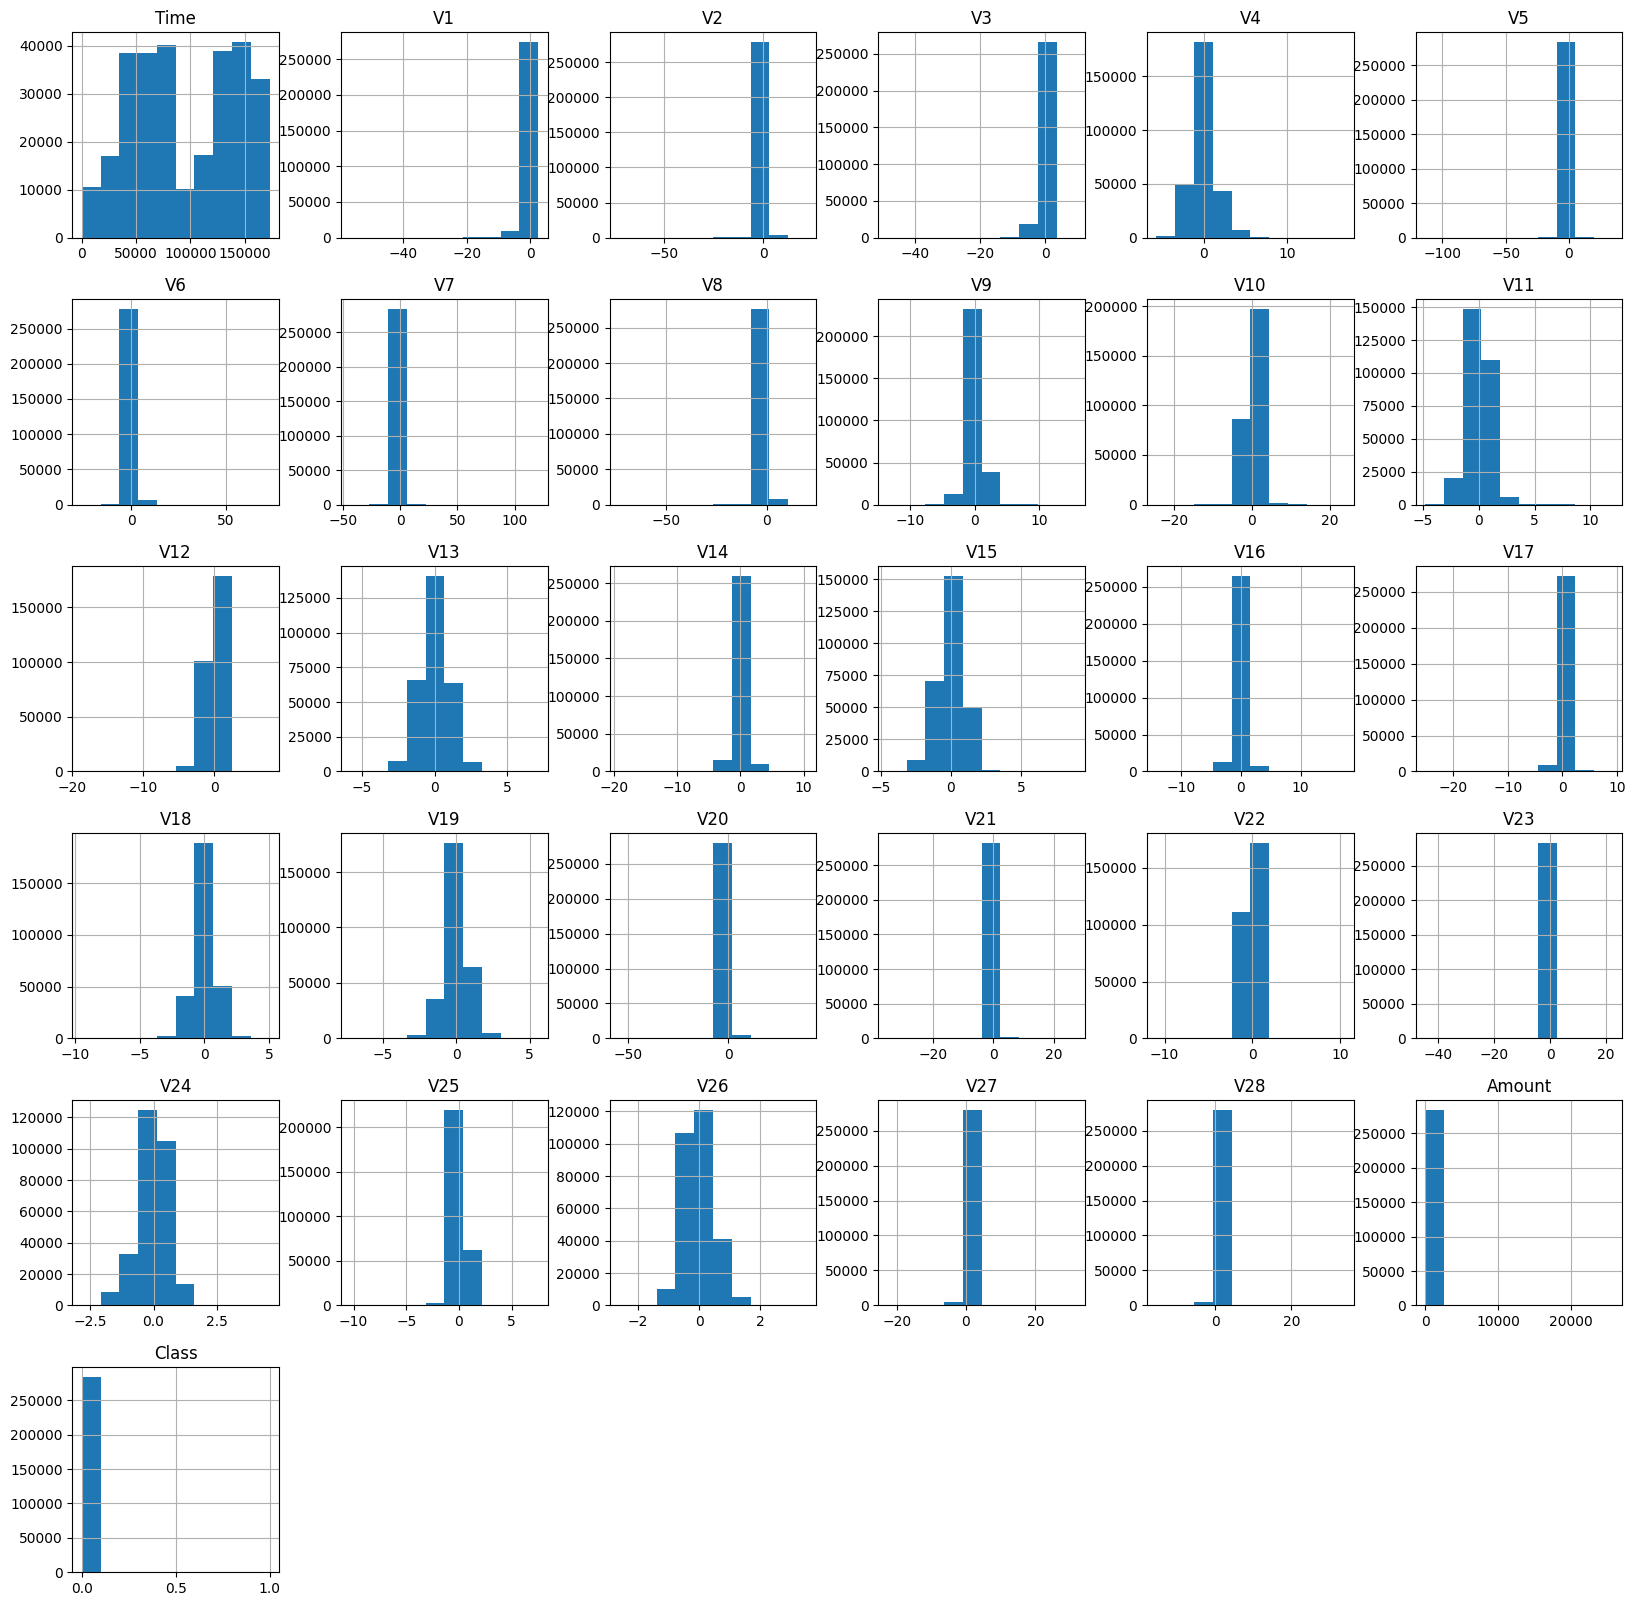

In [9]:
data.hist(figsize=(20,20))
plt.show()

In [10]:
data['hour']=((data['Time']//3600)//2.).astype('int')
data['second']=(data['Time']%3600).astype('int')
data.drop('Time',axis=1,inplace=True)
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,second
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,2


In [11]:
data.duplicated().value_counts()

False    283726
True       1081
Name: count, dtype: int64

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
data.duplicated().value_counts()

False    283726
Name: count, dtype: int64

In [14]:
data.reset_index(drop = True , inplace = True)

In [15]:
print(data['Class'].value_counts())
print('\n')
print(data['Class'].value_counts(normalize=True))

Class
0    283253
1       473
Name: count, dtype: int64


Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


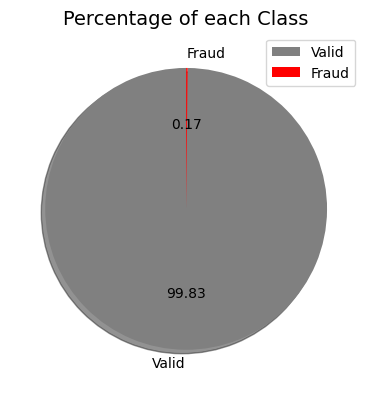

In [16]:
classes=data['Class'].value_counts()
Valid=round(classes[0]/data['Class'].count(), 4)
Fraud=round(classes[1]/data['Class'].count(), 4)
plt.figure(figsize=(10,5))

plt.subplot(122)
plt.title('Percentage of each Class', fontsize=14)
plt.pie(x=[Valid,Fraud],labels=['Valid','Fraud'],
        autopct='%.2f', colors=['gray','red'], startangle=90, shadow=True)
plt.legend(loc='best')

plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)
rob_scaler = RobustScaler()
X_train = rob_scaler.fit_transform(X_train)
X_test = rob_scaler.fit_transform(X_test)

In [18]:
import pickle  # Ensure this is imported
with open('robscaler.sav', 'wb') as scaler_file:
    pickle.dump(rob_scaler, scaler_file)

In [19]:
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)
infogain_classif.fit(X_train, y_train)
X_train = infogain_classif.transform(X_train)
X_test = infogain_classif.transform(X_test)

for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],4)}')

Feature 0 : 0.0019
Feature 1 : 0.0031
Feature 2 : 0.0047
Feature 3 : 0.0048
Feature 4 : 0.0022
Feature 5 : 0.002
Feature 6 : 0.0037
Feature 7 : 0.0015
Feature 8 : 0.0041
Feature 9 : 0.0074
Feature 10 : 0.0066
Feature 11 : 0.0074
Feature 12 : 0.0002
Feature 13 : 0.0079
Feature 14 : 0.0
Feature 15 : 0.0058
Feature 16 : 0.0079
Feature 17 : 0.004
Feature 18 : 0.001
Feature 19 : 0.0009
Feature 20 : 0.0022
Feature 21 : 0.0002
Feature 22 : 0.0004
Feature 23 : 0.0004
Feature 24 : 0.0002
Feature 25 : 0.0001
Feature 26 : 0.0022
Feature 27 : 0.0016
Feature 28 : 0.0015
Feature 29 : 0.0025
Feature 30 : 0.0


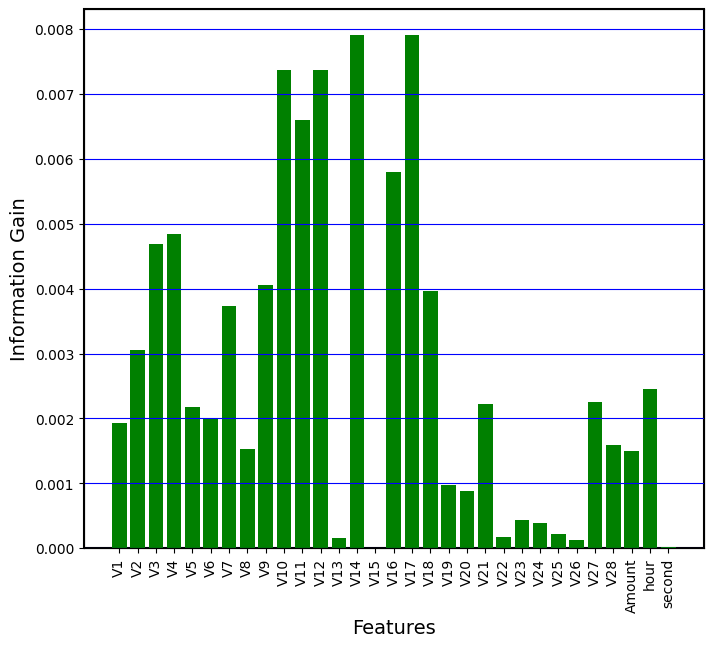

In [22]:
original_columns = data.drop('Class', axis=1).columns  # Get original column names
plt.bar([original_columns[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_, color=['green'])
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,7)
ax = plt.gca()
ax.patch.set_facecolor('white')
ax.yaxis.grid(True, color = 'blue')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)  # Changed '1.5' to 1.5
plt.xlabel('Features',fontsize=14)
plt.ylabel('Information Gain',fontsize=14)
plt.show()

In [23]:
df = pd.DataFrame(data, columns=['V10' ,'V11' ,'V12' ,'V14' ,'V16' ,'V17', 'Class'])

X = df.drop('Class', axis=1)
y = df['Class']

In [24]:
train, test = train_test_split(df, test_size = 0.3, random_state=42)

print("Train shape",train.shape)
print("Test shape",test.shape)

Train shape (198608, 7)
Test shape (85118, 7)


In [25]:
X_train  = train.drop('Class', axis=1).values
y_train  = train['Class'].values
print("Before using the sampling techniques")
print(X_train.shape)
print(y_train.shape)

Before using the sampling techniques
(198608, 6)
(198608,)


In [26]:
X_test  = test.drop('Class', axis=1)
y_test  = test['Class']
print(X_test.shape)
print(y_test.shape)

(85118, 6)
(85118,)


In [27]:
X_test  = test
y_test  = test['Class']

X_test_Fraud = X_test[X_test.Class==1]
X_test_Valid = X_test[X_test.Class==0]
y_test_Fraud = y_test[X_test.Class==1]
y_test_Valid = y_test[X_test.Class==0]

X_test = X_test.drop('Class', axis=1).values
y_test = y_test.values

X_test_Valid =X_test_Valid.drop('Class', axis=1).values
y_test_Valid = y_test_Valid.values

X_test_Fraud = X_test_Fraud.drop('Class', axis=1).values
y_test_Fraud = y_test_Fraud.values

In [28]:
print("Number of fraudulent transactions in test dataset",y_test_Fraud.shape)
print("Number of valid transactions in test dataset",y_test_Valid.shape)

Number of fraudulent transactions in test dataset (134,)
Number of valid transactions in test dataset (84984,)


In [29]:
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate,KFold,StratifiedKFold
from bayes_opt import BayesianOptimization, UtilityFunction

def lgbm_cv(learning_rate, max_depth, num_leaves):
    model = LGBMClassifier(learning_rate = learning_rate,
                                num_leaves = int(round(num_leaves)),
                                max_depth = int(round(max_depth)),
                                class_weight = 'balanced'
                               )

    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring= 'neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params = {'learning_rate': (0.001, 0.2),
           'max_depth': (-1, 8),
           'num_leaves': (2, 250)
          }

lgbmBO = BayesianOptimization(lgbm_cv, params)
utility = UtilityFunction(kind='ucb', kappa=2.5, xi=0.0)
lgbmBO.set_gp_params()
lgbmBO.maximize(init_points=5, n_iter=8, acquisition_function=utility)

params_lgbm = lgbmBO.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round(params_lgbm['num_leaves'])
print(f"|   iter    |  target   | learning_rate | max_depth | num_leaves |")
print("-------------------------------------------------------------")

for i, res in enumerate(lgbmBO.res):
    print(f"| {i + 1:9d} | {res['target']:.5f} | {res['params']['learning_rate']:.5f} | {res['params']['max_depth']:.3f} | {res['params']['num_leaves']:.1f} |")

print("=============================================================")
print(params_lgbm)

|   iter    |  target   | learni... | max_depth | num_le... |
-------------------------------------------------------------
[LightGBM] [Info] Number of positive: 271, number of negative: 158615
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 158886, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [30]:
from collections import Counter
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 598.844


In [31]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from bayes_opt.util import UtilityFunction
from bayes_opt import BayesianOptimization
def xgb_cv(learning_rate, max_depth, n_estimators):

    model = XGBClassifier(learning_rate = learning_rate,
                                max_depth = int(round(max_depth)),
                                n_estimators = int(round(n_estimators)),
                                scale_pos_weight = 592
                          )
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring='neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params={'learning_rate': (0.001, 0.2),
           'max_depth': (3, 10),
           'n_estimators': (50, 100)
          }

xgbBO = BayesianOptimization(xgb_cv, params)
utility = UtilityFunction(kind='ucb', kappa=2.5, xi=0.0)
xgbBO.set_gp_params()
xgbBO.maximize(init_points=5, n_iter = 8, acquisition_function=utility)

params_xgb = xgbBO.max['params']
params_xgb['max_depth'] = round(params_xgb['max_depth'])
params_xgb['n_estimators'] = round(params_xgb['n_estimators'])
params_xgb['learning_rate'] = round((params_xgb['learning_rate']),4)
print(f"|   iter    |  target   | learning_rate | max_depth | n_estimators |")
print("-------------------------------------------------------------")

for i, res in enumerate(xgbBO.res):
    print(f"| {i + 1:9d} | {res['target']:.5f} | {res['params']['learning_rate']:.6f} | {res['params']['max_depth']:.3f} | {res['params']['n_estimators']:.2f} |")

print("=============================================================")
print(params_xgb)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | -0.005045 | 0.1148    | 8.475     | 86.85     |
| 2         | -0.18     | 0.01678   | 6.192     | 84.72     |
| 3         | -0.004806 | 0.1884    | 9.731     | 74.98     |
| 4         | -0.3987   | 0.009963  | 5.592     | 51.8      |
| 5         | -0.004756 | 0.1517    | 9.622     | 94.44     |
| 6         | -0.02524  | 0.1378    | 4.199     | 90.56     |
| 7         | -0.005159 | 0.1553    | 7.833     | 63.58     |
| 8         | -0.00527  | 0.1365    | 7.884     | 68.1      |
| 9         | -0.004875 | 0.1282    | 8.734     | 67.51     |
| 10        | -0.05158  | 0.123     | 3.0       | 99.78     |
| 11        | -0.6449   | 0.001     | 3.0       | 73.24     |
| 12        | -0.6104   | 0.001     | 10.0      | 100.0     |
| 13        | -0.004909 | 0.2       | 10.0      | 90.62     |
|   iter    |  target   | learning_rate | max_depth | n_estimators |
-

In [32]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from bayes_opt.util import UtilityFunction
from bayes_opt import BayesianOptimization

# Assuming X_train and y_train are already defined
# Use only 10% of the training data
sample_size = int(0.5 * len(y_train))
X_train_sample = X_train[:sample_size]
y_train_sample = y_train[:sample_size]

def rf_cv(n_estimators, max_depth, min_samples_split):
    model = RandomForestClassifier(
        n_estimators=int(round(n_estimators)),
        max_depth=int(round(max_depth)),
        min_samples_split=int(round(min_samples_split)),
        random_state=42
    )
    
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train_sample, y_train_sample, cv=cv, scoring='neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params = {
    'n_estimators': (50, 100),  # Number of trees in the forest
    'max_depth': (3, 10),       # Maximum depth of the tree
    'min_samples_split': (2, 20) # Minimum number of samples required to split an internal node
}

rfBO = BayesianOptimization(rf_cv, params)
utility = UtilityFunction(kind='ucb', kappa=2.5, xi=0.0)
rfBO.set_gp_params()
rfBO.maximize(init_points=5, n_iter=8, acquisition_function=utility)

params_rf = rfBO.max['params']
params_rf['n_estimators'] = int(round(params_rf['n_estimators']))
params_rf['max_depth'] = int(round(params_rf['max_depth']))
params_rf['min_samples_split'] = int(round(params_rf['min_samples_split']))

print(f"|   iter    |  target   | n_estimators | max_depth | min_samples_split |")
print("------------------------------------------------------------")

for i, res in enumerate(rfBO.res):
    print(f"| {i + 1:9d} | {res['target']:.5f} | {res['params']['n_estimators']:.2f} | {res['params']['max_depth']:.2f} | {res['params']['min_samples_split']:.2f} |")

print("=============================================================")
print(params_rf)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | -0.003813 | 3.065     | 14.04     | 94.67     |
| 2         | -0.003457 | 7.391     | 16.04     | 85.63     |
| 3         | -0.003602 | 4.457     | 13.82     | 75.0      |
| 4         | -0.003529 | 8.781     | 19.78     | 62.19     |
| 5         | -0.003822 | 3.434     | 12.09     | 80.63     |
| 6         | -0.003413 | 7.679     | 9.839     | 88.65     |
| 7         | -0.003409 | 7.474     | 11.69     | 88.78     |
| 8         | -0.00354  | 9.728     | 11.68     | 85.77     |
| 9         | -0.003542 | 9.88      | 9.92      | 91.45     |
| 10        | -0.00355  | 9.633     | 17.26     | 88.56     |
| 11        | -0.0035   | 4.507     | 9.227     | 88.56     |
| 12        | -0.003515 | 8.804     | 19.97     | 82.52     |
| 13        | -0.003325 | 7.991     | 3.693     | 88.09     |
|   iter    |  target   | n_estimators | max_depth | min_samples_split

In [33]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, StratifiedKFold
from bayes_opt.util import UtilityFunction
from bayes_opt import BayesianOptimization
from sklearn.preprocessing import StandardScaler

# Assuming X_train and y_train are already defined

# Remove NaN values from y_train if any (this should not be necessary based on your previous checks)
mask = ~np.isnan(y_train)
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

sample_size = int(0.5 * len(y_train_clean))
X_train_sample = X_train_clean[:sample_size]
y_train_sample = y_train_clean[:sample_size]

# Scale the data
scaler = StandardScaler()
X_train_sample = scaler.fit_transform(X_train_sample)

def svm_cv(C, gamma):
    model = SVC(
        C=C,
        gamma=gamma,
        random_state=42
    )
    
    cv = StratifiedKFold(n_splits=5)
    
    try:
        scores = cross_validate(model, X_train_sample, y_train_sample, cv=cv, scoring='accuracy')  # Changed to accuracy
        print(f"Testing C: {C}, gamma: {gamma}, score: {np.mean(scores['test_score'])}")  # Debugging output
        return np.mean(scores['test_score'])
    except Exception as e:
        print(f"Error during model fitting: {e}")  # Debugging output
        return float('-inf')  # Return a very low score to indicate failure

# Interval to be explored for input values
params = {
    'C': (0.1, 10),  # Regularization parameter
    'gamma': (0.001, 1)  # Kernel coefficient
}

svmBO = BayesianOptimization(svm_cv, params)
utility = UtilityFunction(kind='ucb', kappa=2.5, xi=0.0)
svmBO.set_gp_params()
svmBO.maximize(init_points=5, n_iter=8, acquisition_function=utility)

params_svm = svmBO.max['params']
params_svm['C'] = params_svm['C']
params_svm['gamma'] = params_svm['gamma']

print(f"|   iter    |  target   |      C      |    gamma    |")
print("-------------------------------------------------------------")

for i, res in enumerate(svmBO.res):
    print(f"| {i + 1:9d} | {res['target']:.5f} | {res['params']['C']:.5f} | {res['params']['gamma']:.5f} |")

print("=============================================================")
print(params_svm)

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
Testing C: 9.527275554312551, gamma: 0.8263369247404516, score: 0.9983988559359653
| 1         | 0.9984    | 9.527     | 0.8263    |
Testing C: 2.0844081498419187, gamma: 0.05452561632464006, score: 0.9994864261298806
| 2         | 0.9995    | 2.084     | 0.05453   |
Testing C: 6.420607599293808, gamma: 0.19601419604875675, score: 0.999214532947591
| 3         | 0.9992    | 6.421     | 0.196     |
Testing C: 7.828785037956954, gamma: 0.20323104965581765, score: 0.999214532947591
| 4         | 0.9992    | 7.829     | 0.2032    |
Testing C: 5.509250622662404, gamma: 0.992369848800368, score: 0.9984089259223708
| 5         | 0.9984    | 5.509     | 0.9924    |
Testing C: 2.086174599548357, gamma: 0.05629206602004699, score: 0.9994864261298806
| 6         | 0.9995    | 2.086     | 0.05629   |
Testing C: 1.1966772840481874, gamma: 0.9411042466067773, score: 0.9984089254153222
| 7         | 0.

In [34]:
from sklearn.model_selection import cross_validate,StratifiedKFold
X = data.drop('Class', axis = 1)
y = data['Class']
Accuracy = []
Precision = []
Recall = []
F1_score = []
ROC_AUC = []
def cv_results(model):
    sk_fold = StratifiedKFold(n_splits=5)
    scoring = ["accuracy","precision","recall","f1","roc_auc"]
    cv_scores = cross_validate(model, X, y, scoring = scoring, cv = sk_fold)
    print("Accuracy : ",cv_scores["test_accuracy"].mean()*100)
    Accuracy.append(cv_scores["test_accuracy"].mean()*100)
    print("Precision : ",cv_scores["test_precision"].mean()*100)
    Precision.append(cv_scores["test_precision"].mean()*100)
    print("Recall : ",cv_scores["test_recall"].mean()*100)
    Recall.append(cv_scores["test_recall"].mean()*100)
    print("F1 Score : ",cv_scores["test_f1"].mean()*100)
    F1_score.append(cv_scores["test_f1"].mean()*100)
    print("ROC AUC : ",cv_scores["test_roc_auc"].mean()*100)
    ROC_AUC.append(cv_scores["test_roc_auc"].mean()*100)

In [35]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scikeras.wrappers import KerasClassifier  # Import from scikeras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from bayes_opt import BayesianOptimization
sample_size = int(0.5 * len(y_train))  
X_train_sample = X_train[:sample_size]
y_train_sample = y_train[:sample_size]
def build_ann(hidden_units, learning_rate):
    model = Sequential([
        Dense(int(round(hidden_units)), activation='relu', input_shape=(X_train_sample.shape[1],)),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
def ann_cv(learning_rate, hidden_units):
    model = KerasClassifier(
        model=build_ann,
        hidden_units=int(round(hidden_units)),
        learning_rate=learning_rate,
        epochs=5,  # Reduced epochs for speed
        batch_size=64,
        verbose=0
    )
    cv = StratifiedKFold(n_splits=3)
    y_pred_proba = cross_val_predict(model, X_train_sample, y_train_sample, cv=cv, method='predict_proba')
    return roc_auc_score(y_train_sample, y_pred_proba[:, 0]) 
params = {
    'learning_rate': (1e-4, 1e-2),
    'hidden_units': (8, 64),
}
annBO = BayesianOptimization(ann_cv, params)
annBO.maximize(init_points=3, n_iter=5)
params_ann = annBO.max['params']
params_ann['hidden_units'] = int(round(params_ann['hidden_units']))
print("Best ANN parameters:", params_ann)
final_model = build_ann(hidden_units=params_ann['hidden_units'], learning_rate=params_ann['learning_rate'])
final_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)
y_pred_proba_final = final_model.predict(X_train)  
y_pred_final = (y_pred_proba_final > 0.5).astype(int)  


|   iter    |  target   | hidden... | learni... |
-------------------------------------------------
| 1         | 0.07576   | 18.74     | 0.009383  |
| 2         | 0.07181   | 46.1      | 0.003802  |
| 3         | 0.06752   | 19.3      | 0.002821  |
| 4         | 0.08651   | 22.71     | 0.0006682 |
| 5         | 0.06378   | 22.72     | 0.00762   |
| 6         | 0.06717   | 39.8      | 0.004265  |
| 7         | 0.07638   | 22.0      | 0.006995  |
| 8         | 0.07373   | 22.0      | 0.007047  |
Best ANN parameters: {'hidden_units': 23, 'learning_rate': 0.0006682497556644544}
Epoch 1/10
3104/3104 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8874 - loss: 0.2506
Epoch 2/10
3104/3104 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9993 - loss: 0.0048
Epoch 3/10
3104/3104 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9992 - loss: 0.0044
Epoch 4/10
3104/3104 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9992 - loss: 0.0038
Epoch 5/10
3104/3104 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 

In [36]:
# Calculate metrics
accuracy_final = accuracy_score(y_train, y_pred_final)
precision_final = precision_score(y_train, y_pred_final)
recall_final = recall_score(y_train, y_pred_final)
f1_final = f1_score(y_train, y_pred_final)
roc_auc_final = roc_auc_score(y_train, y_pred_proba_final) 
print("Final Evaluation Metrics:")
print(f"Accuracy: {accuracy_final*100:.4f}")
print(f"Precision: {precision_final*100:.4f}")
print(f"Recall: {recall_final*100:.4f}")
print(f"F1 Score: {f1_final*100:.4f}")
print(f"ROC AUC: {roc_auc_final*100:.4f}")

Final Evaluation Metrics:
Accuracy: 99.9376
Precision: 86.9416
Recall: 74.6313
F1 Score: 80.3175
ROC AUC: 96.3030


In [37]:
from lightgbm import LGBMClassifier
LGBM= LGBMClassifier(learning_rate=0.17112, max_depth=7, num_leaves=137,class_weight='balanced')
cv_results(LGBM)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [38]:
from xgboost import XGBClassifier
XGB = XGBClassifier(scale_pos_weight=592,learning_rate=0.2,max_depth=10,n_estimators=50)
cv_results(XGB)

Accuracy :  99.91928840945313
Precision :  77.29562016643334
Recall :  79.05711086226205
F1 Score :  77.24127737739657
ROC AUC :  97.31505290648681


In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight='balanced')
cv_results(LR)

Accuracy :  94.91343620230056
Precision :  6.448114178504376
Recall :  89.42665173572229
F1 Score :  11.410306939086826
ROC AUC :  96.67664479919182


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=8, min_samples_split=6, n_estimators=51, random_state=42, class_weight='balanced')
cv_results(rf)

Accuracy :  99.91153452790606
Precision :  74.44369688095385
Recall :  79.05039193729004
F1 Score :  75.52679647402188
ROC AUC :  97.51165098420861


In [41]:
from sklearn.utils import shuffle
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
X = data.drop('Class', axis = 1)
y = data['Class']
def cv_smote(model):
    pipeline1 = make_pipeline(SMOTE(sampling_strategy='minority', k_neighbors = 5, n_jobs=-1, random_state = 42),model)
    sk_fold = StratifiedKFold(n_splits=5)
    scoring = ["accuracy","precision","recall","f1","roc_auc"]
    cv_scores = cross_validate(model, X, y, scoring = scoring, cv = sk_fold)
    print("Accuracy : ",cv_scores["test_accuracy"].mean()*100)
    print("Precision : ",cv_scores["test_precision"].mean()*100)
    print("Recall : ",cv_scores["test_recall"].mean()*100)
    print("F1 Score : ",cv_scores["test_f1"].mean()*100)
    print("ROC AUC : ",cv_scores["test_roc_auc"].mean()*100)

In [42]:
from imblearn.over_sampling import SMOTE  # Import SMOTE

sample_size = int(0.9 * len(y_train))
X_train_half = X_train[:sample_size]
y_train_half = y_train[:sample_size]

# Apply SMOTE to the sampled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_half, y_train_half)

# Final training on the resampled dataset with optimal parameters
final_model = build_ann(hidden_units=params_ann['hidden_units'], learning_rate=params_ann['learning_rate'])
final_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=64, verbose=1)

# Evaluate the final model
y_pred_proba_final = final_model.predict(X_train_resampled)  # Use predict instead of predict_proba
y_pred_final = (y_pred_proba_final > 0.5).astype(int)  # Threshold at 0.5 for binary classification

# Calculate metrics
accuracy = accuracy_score(y_train_resampled, y_pred_final)
precision = precision_score(y_train_resampled, y_pred_final)
recall = recall_score(y_train_resampled, y_pred_final)
f1 = f1_score(y_train_resampled, y_pred_final)
roc_auc = roc_auc_score(y_train_resampled, y_pred_proba_final)

# Print metrics
print(f"Accuracy: {accuracy*100:.4f}")
print(f"Precision: {precision*100:.4f}")
print(f"Recall: {recall*100:.4f}")
print(f"F1 Score: {f1*100:.4f}")
print(f"ROC AUC: {roc_auc*100:.4f}")

Epoch 1/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8819 - loss: 0.2747
Epoch 2/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9403 - loss: 0.1505
Epoch 3/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9470 - loss: 0.1408
Epoch 4/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9487 - loss: 0.1333
Epoch 5/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9507 - loss: 0.1261
Epoch 6/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9533 - loss: 0.1197
Epoch 7/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9560 - loss: 0.1155
Epoch 8/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9583 - loss: 0.1110
Epoch 9/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9589 - loss: 0.1086
Epoch 10/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9602 - loss: 0.1049
11153/11153 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step
Accuracy: 96.0754
Precision: 97.6958
Recall: 94.3768
F1 Score: 

In [43]:
from lightgbm import LGBMClassifier
lightgbm1 = LGBMClassifier()
cv_smote(lightgbm1)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001665 -> initscore=-6.396056
[LightGBM] [Info] Start training from score -6.396056
[LightGBM] [Info] Number of positive: 379, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7673
[LightGBM] [Info] Number of data points in the train set: 226981, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001670 -> initscore=-6.393414
[LightGBM] [Info] Start training from score -6.393414
[LightGBM] [

In [44]:
from xgboost import XGBClassifier
xgboost1 = XGBClassifier()
cv_smote(xgboost1)

Accuracy :  99.93479635887965
Precision :  85.24568956835256
Recall :  78.0
F1 Score :  80.45699858576079
ROC AUC :  97.04958074963285


In [45]:
from catboost import CatBoostClassifier
catboost1 = CatBoostClassifier(iterations=100, verbose=False)
cv_smote(catboost1)

Accuracy :  99.49740608052397
Precision :  50.04487624782363
Recall :  76.09854423292273
F1 Score :  50.654008597031876
ROC AUC :  96.050684550262


In [46]:
LR1 = LogisticRegression(class_weight='balanced')
cv_smote(LR1)

Accuracy :  94.91343620230056
Precision :  6.448114178504376
Recall :  89.42665173572229
F1 Score :  11.410306939086826
ROC AUC :  96.67664479919182


In [55]:
from sklearn.ensemble import VotingClassifier
Model1 = [('lightgbm', LGBM), ('xgboost', XGB), ('catboost', catboost1)]
Model2 = [('lightgbm', LGBM), ('xgboost', XGB)]
Model3 = [('catboost', catboost1), ('xgboost', XGB)]
Model4 = [('lightgbm', LGBM), ('catboost', catboost1)]
Model5 = [('lightgbm', LGBM), ('xgboost', XGB), ('randomforest', rf)]
Model6 = [('lightgbm', LGBM), ('catboost', catboost1), ('randomforest', rf)]

# Create VotingClassifier instances
voting1 = VotingClassifier(estimators=Model1, voting='soft')
voting2 = VotingClassifier(estimators=Model2, voting='soft')
voting3 = VotingClassifier(estimators=Model3, voting='soft')
voting4 = VotingClassifier(estimators=Model4, voting='soft')
voting5 = VotingClassifier(estimators=Model5, voting='soft')
voting6 = VotingClassifier(estimators=Model6, voting='soft')

In [56]:
cv_results(voting1)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [57]:
cv_results(voting2)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [58]:
cv_results(voting3)

Accuracy :  99.9168212689947
Precision :  78.81256001536393
Recall :  78.00223964165734
F1 Score :  77.04676398815259
ROC AUC :  96.7400001046228


In [59]:
cv_results(voting4)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [60]:
cv_results(voting5)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [61]:
cv_results(voting6)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [62]:
from sklearn.utils import shuffle
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
X = data.drop('Class', axis = 1)
y = data['Class']
def cv_undersampler(model):
    pipeline2 = make_pipeline(RandomUnderSampler(sampling_strategy='majority',random_state = 42),model)
    sk_fold = StratifiedKFold(n_splits=5)
    scoring = ["accuracy","precision","recall","f1","roc_auc"]
    cv_values = cross_validate(model, X, y, scoring = scoring, cv = sk_fold)
    print("Accuracy : ",cv_values["test_accuracy"].mean()*100)
    print("Precision : ",cv_values["test_precision"].mean()*100)
    print("Recall : ",cv_values["test_recall"].mean()*100)
    print("F1 Score : ",cv_values["test_f1"].mean()*100)
    print("ROC AUC : ",cv_values["test_roc_auc"].mean()*100)

In [63]:
lightgbm2 = LGBMClassifier()
cv_undersampler(lightgbm2)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001665 -> initscore=-6.396056
[LightGBM] [Info] Start training from score -6.396056
[LightGBM] [Info] Number of positive: 379, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7673
[LightGBM] [Info] Number of data points in the train set: 226981, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001670 -> initscore=-6.393414
[LightGBM] [Info] Start training from score -6.393414
[LightGBM] [

In [64]:
xgboost2 = XGBClassifier()
cv_undersampler(xgboost2)

Accuracy :  99.93479635887965
Precision :  85.24568956835256
Recall :  78.0
F1 Score :  80.45699858576079
ROC AUC :  97.04958074963285


In [65]:
catboost2 = CatBoostClassifier(verbose=False)
cv_undersampler(catboost2)

Accuracy :  99.6228801253093
Precision :  74.04650620386353
Recall :  78.63157894736842
F1 Score :  68.67877352447422
ROC AUC :  96.58512183491948


In [66]:
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression(class_weight='balanced')
cv_undersampler(LR2)

Accuracy :  94.91343620230056
Precision :  6.448114178504376
Recall :  89.42665173572229
F1 Score :  11.410306939086826
ROC AUC :  96.67664479919182


In [67]:
from imblearn.under_sampling import RandomUnderSampler  # Import RandomUnderSampler

# Sample 50% of the original dataset
sample_size = int(0.9 * len(y_train))
X_train_half = X_train[:sample_size]
y_train_half = y_train[:sample_size]

# Apply Random Under Sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_half, y_train_half)

# Final training on the undersampled dataset with optimal parameters
final_model = build_ann(hidden_units=params_ann['hidden_units'], learning_rate=params_ann['learning_rate'])
final_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=64, verbose=1)

# Evaluate the final model
y_pred_proba_final = final_model.predict(X_train_resampled)  # Use predict instead of predict_proba
y_pred_final = (y_pred_proba_final > 0.5).astype(int)  # Threshold at 0.5 for binary classification

# Calculate metrics
accuracy = accuracy_score(y_train_resampled, y_pred_final)
precision = precision_score(y_train_resampled, y_pred_final)
recall = recall_score(y_train_resampled, y_pred_final)
f1 = f1_score(y_train_resampled, y_pred_final)
roc_auc = roc_auc_score(y_train_resampled, y_pred_proba_final)

# Print metrics
print(f"Accuracy: {accuracy*100:.4f}")
print(f"Precision: {precision*100:.4f}")
print(f"Recall: {recall*100:.4f}")
print(f"F1 Score: {f1*100:.4f}")
print(f"ROC AUC: {roc_auc*100:.4f}")

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4975 - loss: 2.0845
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4985 - loss: 1.9464
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4615 - loss: 1.6761
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5002 - loss: 1.2771
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5125 - loss: 1.0072
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5711 - loss: 0.7750
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.5843
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8894 - loss: 0.4736
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.4413
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9089 - loss: 0.3878
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 90.0651
Precision: 88.4375
Recall: 92.1824
F1 Score: 90.2711
ROC AUC: 95.5989


In [70]:
models =[LR,LGBM, XGB, catboost1,rf, voting1, voting2, voting3, voting4, voting5, voting6]
names = ["LR","LGBM", "XGB", "CatBoost", "RandomForest", "Vot_Lg,Xg,Ca", "Vot_Lg,Xg","Vot_Xg,Ca", "Vot_Lg,Ca", "Vot_Lg,Xg,rf", "Vot_Lg,Ca,rf"]


In [71]:
from sklearn.metrics import matthews_corrcoef
X = data.drop(['Class'] ,axis=1)
y = data['Class']
i=0
j=0
for model in models:
    cv = StratifiedKFold(n_splits=5)
    MCC = []
    for train, test in cv.split(X, y):
        pred = model.fit(X.iloc[train], y.iloc[train]).predict(X.iloc[test])
        MCC.append(matthews_corrcoef(y.iloc[test], pred))
        i+=1
    mean_MCC = np.mean(MCC)
    print("MCC : " ,mean_MCC,"\n")
    print("***************************************")
    i=0
    j=j+1


MCC :  0.21273725188044965 

***************************************
[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [72]:
MCC = [0.21273725188044965, 0.7825212957878277, 0.7766774250002483, 0.5561415824238347, 0.7608970880054027, 0.7897859136199358, 0.7768384441347749, 0.7963092717965976, 0.7912174217179584, 0.7768131572826962, 0.792196582021453]

In [73]:
Accuracy = np.array(Accuracy)
Precision = np.array(Precision)
Recall = np.array(Recall)
F1_score = np.array(F1_score)
MCC = np.array(MCC)
ROC_AUC = np.array(ROC_AUC)

Accuracy = np.round(Accuracy, 2)
Precision = np.round(Precision, 2)
Recall = np.round(Recall, 2)
F1_score = np.round(F1_score, 2)
MCC = np.round(MCC, 2)
ROC_AUC = np.round(ROC_AUC, 2)

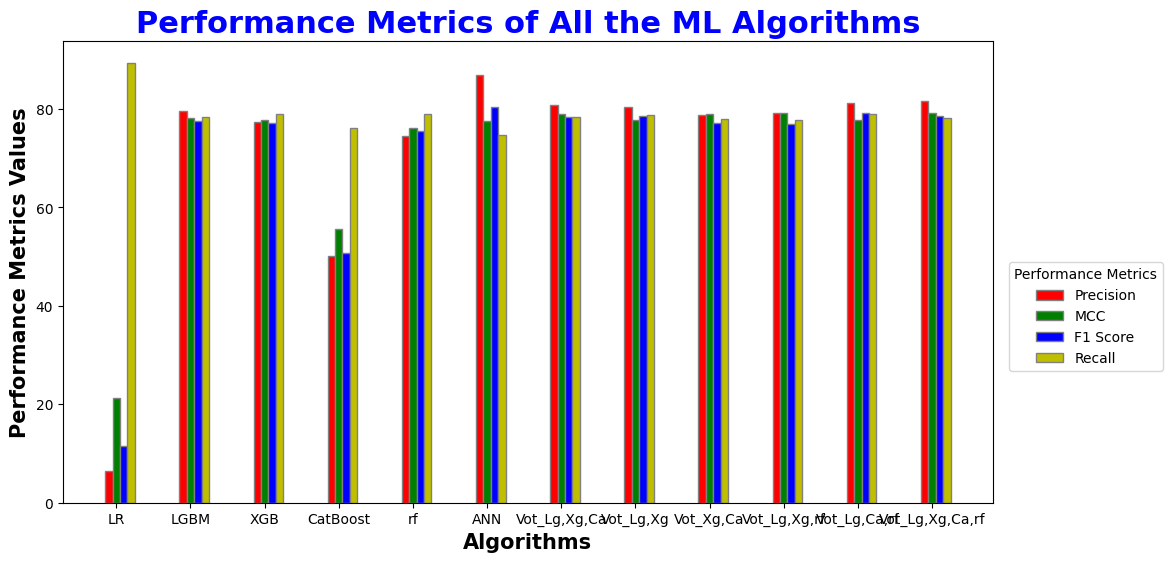

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
Precision = [6.448114178504376, 79.52178500655025, 77.29562016643334, 50.04487624782363, 
             74.44369688095385,86.9416, 80.77388999396288, 80.45904880059635, 78.81256001536393, 
             79.23835651921205, 81.15376720861744, 81.55689398778915]

Recall = [89.42665173572229, 78.42553191489361, 79.05711086226205, 76.09854423292273, 
          79.05039193729004,74.6313, 78.42777155655095, 78.84882418812991, 78.00223964165734, 
          77.79171332586786, 79.05935050391938, 78.21500559910415]

F1_Score = [11.410306939086826, 77.61450400454243, 77.24127737739657, 50.654008597031876, 
             75.52679647402188,80.3175, 78.43394041478051, 78.66503067178631, 77.04676398815259, 
             76.93740922309186, 79.22774193910323, 78.6310369091337]

# Original MCC values converted to percentage
MCC = [value * 100 for value in [0.21273725188044965, 0.7825212957878277, 0.7766774250002483, 
                                 0.5561415824238347, 0.7608970880054027,0.775984, 0.7897859136199358, 
                                 0.7768384441347749, 0.7897859136199358, 0.7912174217179584, 
                                 0.7768131572826962, 0.792196582021453]]  # Length 11

# Ensure all lists have the same length of 11
target_length = 12
# No need to pad since all lists already have the same length

barWidth = 0.1
fig = plt.subplots(figsize=(12, 6))

# Set position of bars on X axis
br1 = np.arange(len(F1_Score))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, Precision, color='r', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(br2, MCC, color='g', width=barWidth, edgecolor='grey', label='MCC')
plt.bar(br3, F1_Score, color='b', width=barWidth, edgecolor='grey', label='F1 Score')
plt.bar(br4, Recall, color='y', width=barWidth, edgecolor='grey', label='Recall')

# Adding Xticks
plt.xlabel('Algorithms', fontweight='bold', fontsize=15)
plt.ylabel('Performance Metrics Values', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(F1_Score))], 
           ["LR", "LGBM", "XGB", "CatBoost", "rf","ANN", "Vot_Lg,Xg,Ca", "Vot_Lg,Xg", "Vot_Xg,Ca", "Vot_Lg,Xg,rf", "Vot_Lg,Ca,rf", "Vot_Lg,Xg,Ca,rf"])
plt.title("Performance Metrics of All the ML Algorithms", fontweight='bold', fontsize=22, color='b')
plt.legend(bbox_to_anchor=(1.1, 0.27), loc='lower center', title="Performance Metrics")
plt.show()

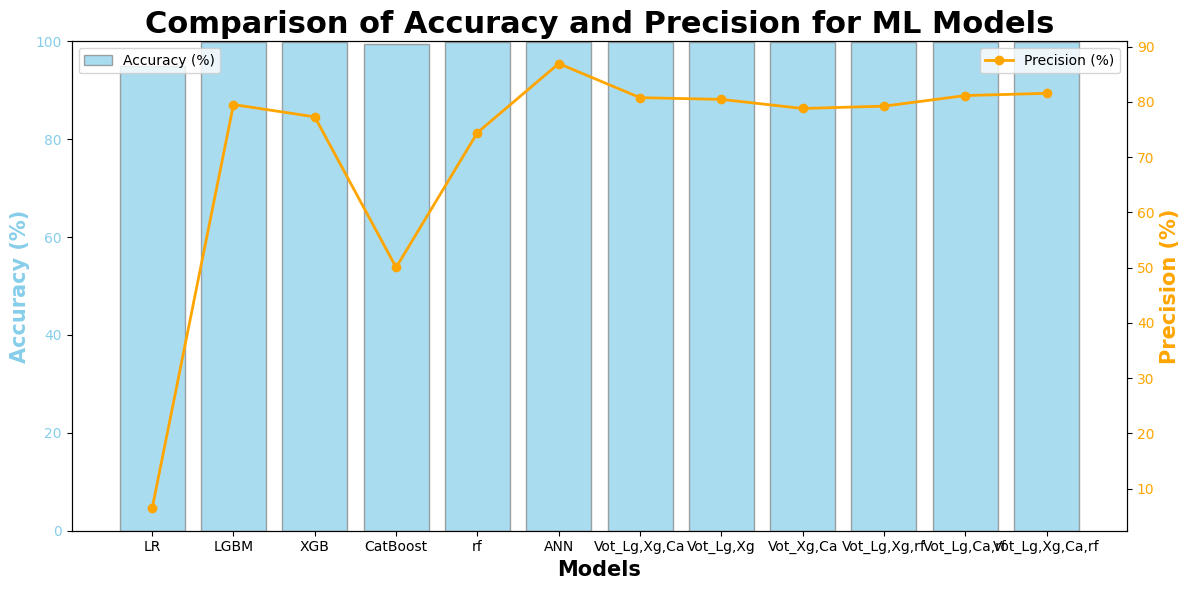

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
Accuracy = [94.91343620230056, 99.92034581481278, 99.91928840945313, 99.49740608052397, 
            99.91153452790606,99.9376, 99.92422277111402, 99.92598502849536, 99.9168212689947, 
            99.91611641076193, 99.92880465396989, 99.9252801454183]

Precision = [6.448114178504376, 79.52178500655025, 77.29562016643334, 50.04487624782363, 
             74.44369688095385,86.9416, 80.77388999396288, 80.45904880059635, 78.81256001536393, 
             79.23835651921205, 81.15376720861744, 81.55689398778915]

# Labels for the models
model_labels = ["LR", "LGBM", "XGB", "CatBoost", "rf","ANN", "Vot_Lg,Xg,Ca", 
                "Vot_Lg,Xg", "Vot_Xg,Ca", "Vot_Lg,Xg,rf", "Vot_Lg,Ca,rf", 
                "Vot_Lg,Xg,Ca,rf"]

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Set position of bars on X axis
x = np.arange(len(model_labels))

# Plotting Accuracy as a bar chart
ax1.bar(x, Accuracy, color='skyblue', edgecolor='grey', label='Accuracy (%)', alpha=0.7)
ax1.set_xlabel('Models', fontweight='bold', fontsize=15)
ax1.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=15, color='skyblue')
ax1.set_ylim(0, 100)  # Assuming accuracy is in percentage
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis to plot Precision
ax2 = ax1.twinx()  
ax2.plot(x, Precision, color='orange', marker='o', label='Precision (%)', linewidth=2)
ax2.set_ylabel('Precision (%)', fontweight='bold', fontsize=15, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adding labels and title
plt.title('Comparison of Accuracy and Precision for ML Models', fontweight='bold', fontsize=22)
plt.xticks(x, model_labels)  # Set the x-ticks to model labels

# Adding a legend
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

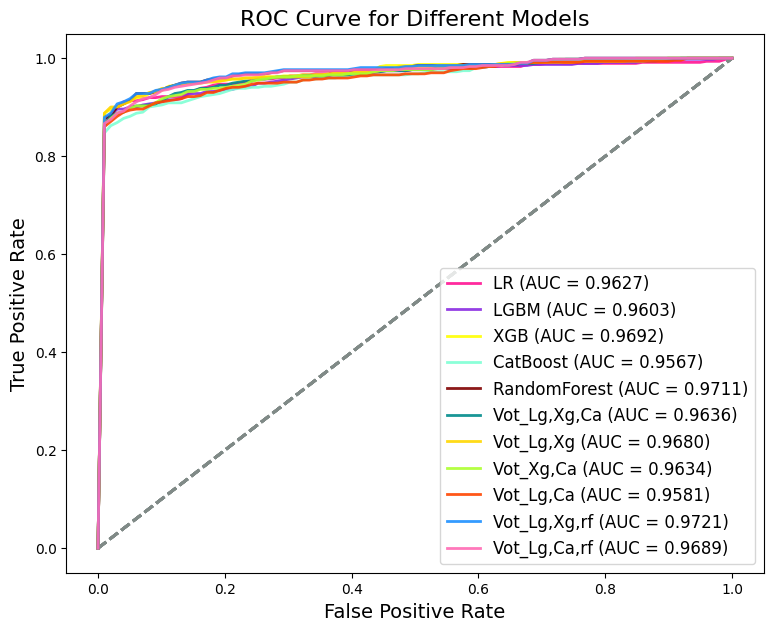

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# Assuming 'data' is your DataFrame and 'models' is a list of your trained models
# Also assuming 'names' is a list of the names of the models corresponding to the 'models' list
# Ensure that models and names both have 11 entries
colors = ['#ff1493', '#8A2BE2', '#FFFF00', '#7FFFD4', '#800000', 
          '#008B8B', '#FFD700', '#ADFF2F', '#FF4500', '#1E90FF', 
          '#FF69B4']  # Add more colors if needed

X = data.drop(['Class'], axis=1)
y = data['Class']

# Create a figure for the ROC curves
f, axes = plt.subplots(figsize=(9, 7))

# Initialize variables for plotting
linestyle = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
j = 0

# Loop through each model
for model in models:
    cv = StratifiedKFold(n_splits=5)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    # Perform cross-validation
    for train, test in cv.split(X, y):
        # Fit the model and predict probabilities
        model.fit(X.iloc[train], y.iloc[train])
        probas_ = model.predict_proba(X.iloc[test])
        
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))  # Interpolate to mean FPR
        tprs[-1][0] = 0.0  # Ensure the first point is (0,0)
        
        # Calculate AUC
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    # Mean TPR and AUC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0  # Ensure the last point is (1,1)
    mean_auc = auc(mean_fpr, mean_tpr)

    # Plotting
    axes.plot([0, 1], [0, 1], linestyle='--', lw=2, color='#808A87', alpha=.8)  # Diagonal line
    axes.plot(mean_fpr, mean_tpr, color=colors[j],
              label=r'%s (AUC = %0.4f)' % (names[j], mean_auc),
              linestyle=linestyle[j], lw=2, alpha=0.9)
    
    j += 1  # Increment model index

# Set limits and labels
axes.set_xlim([-0.05, 1.05])
axes.set_ylim([-0.05, 1.05])
axes.set_xlabel('False Positive Rate', fontsize=14)
axes.set_ylabel('True Positive Rate', fontsize=14)
axes.set_title('ROC Curve for Different Models', fontsize=16)
axes.legend(loc="lower right", prop={'size': 12})

# Show the plot
plt.show()

In [78]:
from prettytable import PrettyTable

# Define the column names
columns = ["Algorithm_name", "Accuracy", "Precision", "Recall", "F1", "MCC", "ROC_AUC"]

# Define values for each column
Algorithm_name = ["LR", "LGBM", "XGB", "CatBoost", "RandomForest","ANN", "Vot_Lg,Xg,Ca", 
                  "Vot_Lg,Xg", "Vot_Xg,Ca", "Vot_Lg,Ca", "Vot_Lg,Xg,rf", "Vot_Lg,Ca,rf"]

Accuracy = [94.91343620230056, 99.92034581481278, 99.91928840945313, 99.49740608052397, 
            99.91153452790606,99.9376, 99.92422277111402, 99.92598502849536, 99.9168212689947, 
            99.91611641076193, 99.92880465396989, 99.9252801454183]

Precision = [6.448114178504376, 79.52178500655025, 77.29562016643334, 50.04487624782363, 
             74.44369688095385,86.9416, 80.77388999396288, 80.45904880059635, 78.81256001536393, 
             79.23835651921205, 81.15376720861744, 81.55689398778915]

Recall = [89.42665173572229, 78.42553191489361, 79.05711086226205, 76.09854423292273, 
          79.05039193729004,74.6313, 78.42777155655095, 78.84882418812991, 78.00223964165734, 
          77.79171332586786, 79.05935050391938, 78.21500559910415]

F1_score = [11.410306939086826, 77.61450400454243, 77.24127737739657, 50.654008597031876, 
             75.52679647402188,80.3175, 78.43394041478051, 78.66503067178631, 77.04676398815259, 
             76.93740922309186, 79.22774193910323, 78.6310369091337]

MCC = [0.21273725188044965, 0.7825212957878277, 0.7766774250002483, 0.5561415824238347, 
       0.7608970880054027,0.775984, 0.7897859136199358, 0.7768384441347749, 0.7963092717965976, 
       0.7912174217179584, 0.7768131572826962, 0.792196582021453]

# Convert MCC values to percentages
MCC_percentage = [mcc * 100 for mcc in MCC]

ROC_AUC = [96.67664479919182, 96.43994981069592, 97.31505290648681, 96.050684550262, 
            97.51165098420861,96.3030, 96.76919485382975, 97.21094331293061, 96.7400001046228, 
            96.21041053410259, 97.60661954487941, 97.28626666058852]

# Create table
myTable = PrettyTable()

# Set max width (adjust this if necessary)
myTable._max_width = {"Algorithm_name": 20, "Accuracy": 10, "Precision": 10, "Recall": 10, 
                      "F1": 10, "MCC": 10, "ROC_AUC": 10}

# Add columns with values rounded to two decimal places
myTable.add_column(columns[0], Algorithm_name)
myTable.add_column(columns[1], [f"{acc:.2f}" for acc in Accuracy])
myTable.add_column(columns[2], [f"{prec:.2f}" for prec in Precision])
myTable.add_column(columns[3], [f"{rec:.2f}" for rec in Recall])
myTable.add_column(columns[4], [f"{f1:.2f}" for f1 in F1_score])
myTable.add_column(columns [5], [f"{mcc:.2f}" for mcc in MCC])
myTable.add_column(columns[6], [f"{roc_auc:.2f}" for roc_auc in ROC_AUC])

print(myTable)

+----------------+----------+-----------+--------+-------+------+---------+
| Algorithm_name | Accuracy | Precision | Recall |   F1  | MCC  | ROC_AUC |
+----------------+----------+-----------+--------+-------+------+---------+
|       LR       |  94.91   |    6.45   | 89.43  | 11.41 | 0.21 |  96.68  |
|      LGBM      |  99.92   |   79.52   | 78.43  | 77.61 | 0.78 |  96.44  |
|      XGB       |  99.92   |   77.30   | 79.06  | 77.24 | 0.78 |  97.32  |
|    CatBoost    |  99.50   |   50.04   | 76.10  | 50.65 | 0.56 |  96.05  |
|  RandomForest  |  99.91   |   74.44   | 79.05  | 75.53 | 0.76 |  97.51  |
|      ANN       |  99.94   |   86.94   | 74.63  | 80.32 | 0.78 |  96.30  |
|  Vot_Lg,Xg,Ca  |  99.92   |   80.77   | 78.43  | 78.43 | 0.79 |  96.77  |
|   Vot_Lg,Xg    |  99.93   |   80.46   | 78.85  | 78.67 | 0.78 |  97.21  |
|   Vot_Xg,Ca    |  99.92   |   78.81   | 78.00  | 77.05 | 0.80 |  96.74  |
|   Vot_Lg,Ca    |  99.92   |   79.24   | 77.79  | 76.94 | 0.79 |  96.21  |
|  Vot_Lg,Xg

In [79]:
undersampler = RandomUnderSampler(sampling_strategy='majority',random_state = 42)
X_resampled,y_resampled = undersampler.fit_resample(X,y)
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.15,stratify=y_resampled,random_state=42)
light = LGBMClassifier()
light.fit(X_train,y_train)
y_pred = light.predict(X_test)

[LightGBM] [Info] Number of positive: 402, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7674
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [80]:
import pickle
filename='new_creditcard1.sav'
pickle.dump(light,open(filename,'wb'))
loaded_model=pickle.load(open('new_creditcard1.sav','rb'))